In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set the random seed for reproducibility
seed = 42


Text(0.5, 1.0, 'Wright-Fisher model with DFE')

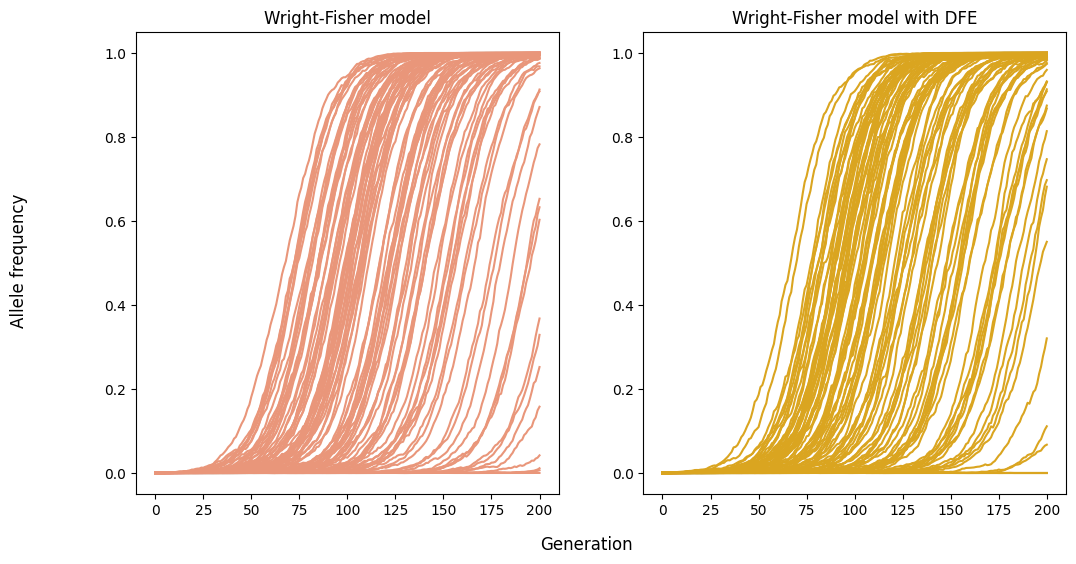

In [2]:
from models import WF_DFE, WF

# Set the parameters
N = 10000
s = 0.1
u = 1e-5
G = 200

# Plot the results  
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

for i in range(100):
    wf = WF(s, u, N, G, seed=None) # Run the basic WFmodel
    dfe = WF_DFE(s, u, N, G, seed=None) # Run the DFE model
    ax[0].plot(np.arange(G+1), wf[:,1], color='darksalmon') # Plot the allele frequency
    ax[1].plot(np.arange(G+1), dfe[:,1], color='goldenrod') # Plot the allele frequency
fig.supxlabel("Generation")
fig.supylabel("Allele frequency")
ax[0].set_title("Wright-Fisher model")
ax[1].set_title("Wright-Fisher model with DFE")

Text(0.5, 1.0, 'WF model + frequency-dependent selection\n$s_{max} = 2 \\cdot s$')

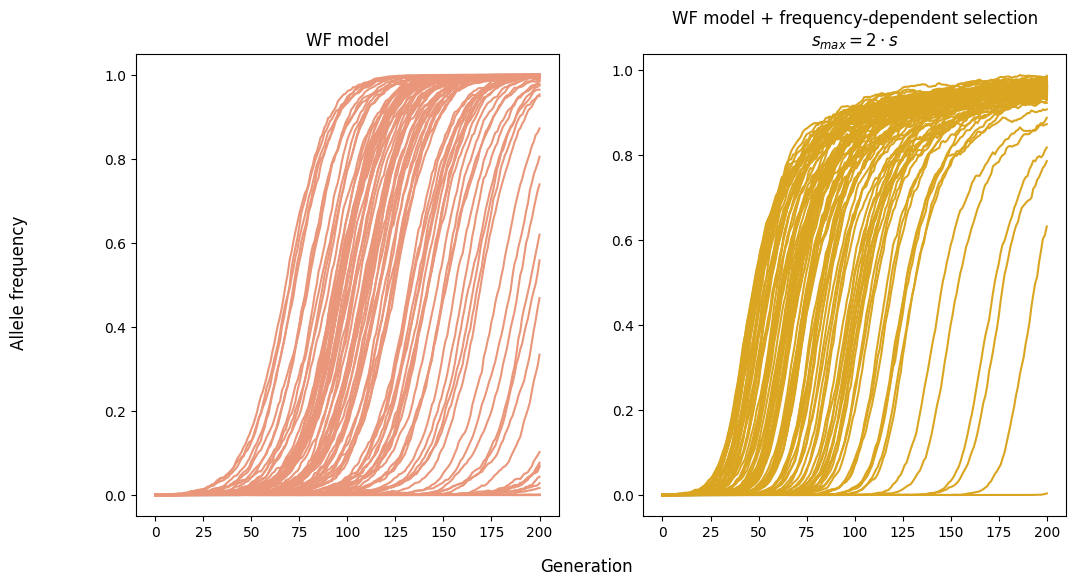

In [3]:
from models import WF_FD

# Plot the results  
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

for i in range(100):
    wf = WF(s, u, N, G, seed=None) # Run the basic WFmodel
    fd = WF_FD(2*s, u, N, G, seed=None) # Run the DFE model
    ax[0].plot(np.arange(G+1), wf[:,1], color='darksalmon') # Plot the allele frequency
    ax[1].plot(np.arange(G+1), fd[:,1], color='goldenrod') # Plot the allele frequency
fig.supxlabel("Generation")
fig.supylabel("Allele frequency")
ax[0].set_title("WF model")
ax[1].set_title("WF model + frequency-dependent selection\n$s_{max} = 2 \\cdot s$")

Text(0.5, 1.0, 'WF model + bottlenecks\nevery 10 generations to 0.01N')

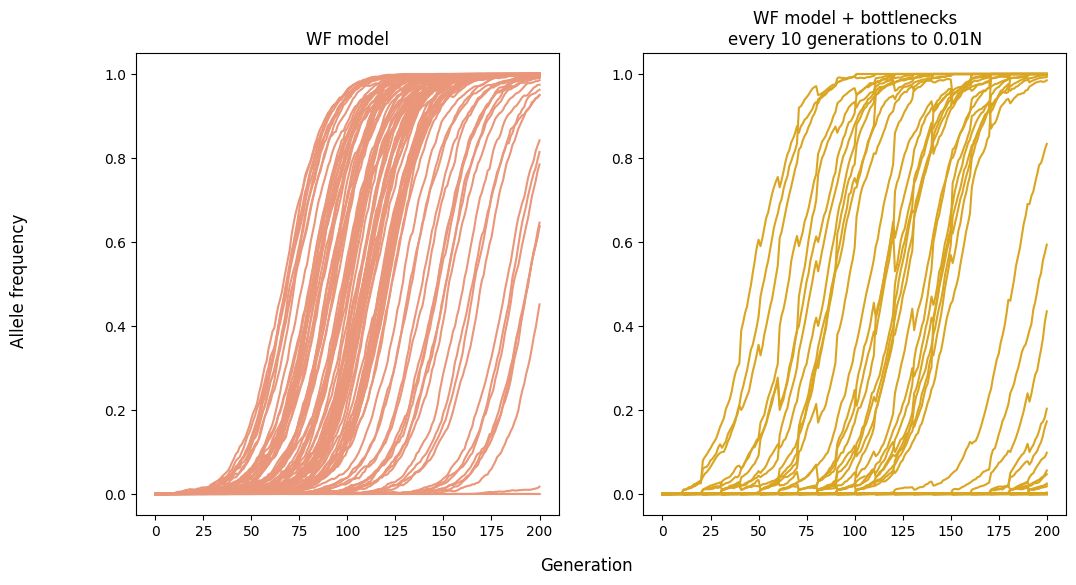

In [9]:
from models import WF_bottleneck

# Plot the results  
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

bottlenecks = [10*(i+1) for i in range(G//10)]
N_bottleneck = N//100
bot_dict = {b: N_bottleneck for b in bottlenecks}

for i in range(100):
    wf = WF(s, u, N, G, seed=None) # Run the basic WFmodel
    fd = WF_bottleneck(s, u, N, G, bot_dict, seed=None) # Run the bottleneck model
    ax[0].plot(np.arange(G+1), wf[:,1], color='darksalmon') # Plot the allele frequency
    ax[1].plot(np.arange(G+1), fd[:,1], color='goldenrod') # Plot the allele frequency
fig.supxlabel("Generation")
fig.supylabel("Allele frequency")
ax[0].set_title("WF model")
ax[1].set_title("WF model + bottlenecks\nevery 10 generations to 0.01N")